# 25280028
# Rubina Noor

In [110]:
import pandas as pd

data_from_API = pd.read_csv("data/raw/healthdata_raw.csv")
loaded_data = pd.read_csv("data/raw/disease_diagnosis.csv")
google_data = pd.read_csv("data/raw/google_trends_raw.csv")

display(data_from_API.head())
display(loaded_data.head())
display(google_data.head())

,round,indicator,group,subgroup,sample_size,response,percent,standard_error,suppression,significant_1,significant_2
0,1,Provider offers telemedicine,Total,Total,6786.0,Total,100.0,NaN,NaN,NaN,NaN
1,1,Provider offers telemedicine,Total,Total,NaN,Yes,36.6,0.8,NaN,NaN,NaN
2,1,Provider offers telemedicine,Total,Total,NaN,No,46.9,0.8,NaN,NaN,NaN
3,1,Provider offers telemedicine,Total,Total,NaN,Do not know,5.2,0.4,NaN,NaN,NaN
4,1,Provider offers telemedicine,Total,Total,NaN,No usual place of care,11.3,0.7,NaN,NaN,NaN


,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan
0,1,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,Flu,Moderate,Medication and rest
1,2,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,Healthy,Mild,Rest and fluids
2,3,32,Male,Body ache,Sore throat,Fatigue,77,36.8,136/60,96,Healthy,Mild,Rest and fluids
3,4,21,Female,Shortness of breath,Headache,Cough,72,38.9,147/82,99,Healthy,Mild,Rest and fluids
4,5,53,Male,Runny nose,Sore throat,Fatigue,100,36.6,109/106,92,Healthy,Mild,Rest and fluids


,date,telemedicine,digital health,mental health app,wearable health device,isPartial
0,2004-01-01,10,3,0,0,False
1,2004-02-01,10,2,0,0,False
2,2004-03-01,10,2,0,0,False
3,2004-04-01,9,1,0,0,False
4,2004-05-01,9,2,0,0,False


(a) Data Quality Assessment:

In [111]:
# for data extracted through API dataset
print("API DATASET INFO:")

# checking for missing values in API dataset
missing_values_api = data_from_API.isnull()

missing_count_api = missing_values_api.sum()

print("MISSING VALUES IN API DATASET:")
print(missing_count_api)


# checkinhg for duplicates in API dataset
duplicates_api = data_from_API.duplicated()

duplicate_count_api = duplicates_api.sum()

print("DUPLICATE ENTRIES IN API DATASET:")
print(duplicate_count_api)


print(data_from_API.dtypes)



API DATASET INFO:
MISSING VALUES IN API DATASET:
round               0
indicator           0
group               0
subgroup            0
sample_size       627
response            0
percent            23
standard_error    194
suppression       775
significant_1     403
significant_2     610
dtype: int64
DUPLICATE ENTRIES IN API DATASET:
0
round               int64
indicator             str
group                 str
subgroup              str
sample_size       float64
response              str
percent           float64
standard_error    float64
suppression           str
significant_1     float64
significant_2     float64
dtype: object


In [112]:
# for loaded dataset
print("LOADED DATASET INFO:")

# checking for missing values in API dataset
missing_values_loaded = loaded_data.isnull()

missing_count_loaded = missing_values_loaded.sum()

print("MISSING VALUES IN LOADED DATASET:")
print(missing_count_loaded)


# checkinhg for duplicates in API dataset
duplicates_loaded = loaded_data.duplicated()

duplicate_count_loaded = duplicates_loaded.sum()

print("DUPLICATE ENTRIES IN LOADED DATASET:")
print(duplicate_count_loaded)


print(loaded_data.dtypes)



LOADED DATASET INFO:
MISSING VALUES IN LOADED DATASET:
Patient_ID             0
Age                    0
Gender                 0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Heart_Rate_bpm         0
Body_Temperature_C     0
Blood_Pressure_mmHg    0
Oxygen_Saturation_%    0
Diagnosis              0
Severity               0
Treatment_Plan         0
dtype: int64
DUPLICATE ENTRIES IN LOADED DATASET:
0
Patient_ID               int64
Age                      int64
Gender                     str
Symptom_1                  str
Symptom_2                  str
Symptom_3                  str
Heart_Rate_bpm           int64
Body_Temperature_C     float64
Blood_Pressure_mmHg        str
Oxygen_Saturation_%      int64
Diagnosis                  str
Severity                   str
Treatment_Plan             str
dtype: object


In [113]:
# for google trends dataset
print("GOOGLE TRENDS DATASET INFO:")

# checking for missing values in API dataset
missing_values_trends = google_data.isnull()

missing_count_trends = missing_values_trends.sum()

print("MISSING VALUES IN GOOGLE TRENDS DATASET:")
print(missing_count_trends)


# checkinhg for duplicates in API dataset
duplicates_trends = google_data.duplicated()

duplicate_count_trends = duplicates_trends.sum()

print("DUPLICATE ENTRIES IN GOOGLE TRENDS DATASET:")
print(duplicate_count_trends)


print(google_data.dtypes)


GOOGLE TRENDS DATASET INFO:
MISSING VALUES IN GOOGLE TRENDS DATASET:
date                      0
telemedicine              0
digital health            0
mental health app         0
wearable health device    0
isPartial                 0
dtype: int64
DUPLICATE ENTRIES IN GOOGLE TRENDS DATASET:
0
date                        str
telemedicine              int64
digital health            int64
mental health app         int64
wearable health device    int64
isPartial                  bool
dtype: object


(b) Transformation and Cleaning:

In [114]:
data_from_API['sample_size'] = data_from_API.groupby(['round', 'indicator', 'group', 'subgroup'])['sample_size'].transform('first')

# fill missing values with median
data_from_API['percent'] = data_from_API['percent'].fillna(data_from_API['percent'].median())

data_from_API['standard_error'] = data_from_API['standard_error'].fillna(data_from_API['standard_error'].median())

# Mark whether the suppression and significance columns have data or not to analyze 
# missing values and patterns
# 1 if the information is available, 0 if it is missing.

data_from_API['suppression'] = data_from_API['suppression'].notna().astype(int)
data_from_API['significant_1'] = data_from_API['significant_1'].notna().astype(int)
data_from_API['significant_2'] = data_from_API['significant_2'].notna().astype(int)

# checking for missing values in API dataset
missing_values_api = data_from_API.isnull()

missing_count_api = missing_values_api.sum()

print("MISSING VALUES IN API DATASET:")
print(missing_count_api)

MISSING VALUES IN API DATASET:
round             0
indicator         0
group             0
subgroup          0
sample_size       0
response          0
percent           0
standard_error    0
suppression       0
significant_1     0
significant_2     0
dtype: int64


In [115]:
import os

# FOR DATASET EXTRACTED FROM API

# Standardize Data Formats

# to ensure consistent formatting for all categorical columns
# strip() to remover whitespaces from start and end
# title() to capitalize first letter and make the rest lowercase
data_from_API['indicator'] = data_from_API['indicator'].str.strip()
data_from_API['group'] = data_from_API['group'].str.strip().str.title()
data_from_API['subgroup'] = data_from_API['subgroup'].str.strip().str.title()
data_from_API['response'] = data_from_API['response'].str.strip().str.title()

# Generate summary statistics 
data_from_API.describe()


# making new folder for cleaned data if it doesnt exist
base_folder = "data/"
os.makedirs(base_folder, exist_ok=True)

cleaned_folder = os.path.join(base_folder, "cleaned")
os.makedirs(cleaned_folder, exist_ok=True)

file_path = os.path.join(cleaned_folder, 'extracted_api_cleaned_data.csv')

data_from_API.to_csv(file_path, index=False)
data_from_API.to_json(os.path.join(cleaned_folder, 'extracted_api_cleaned_data.json'), orient='records', lines=True)



print(f"Cleaned dataset saved successfully at: {file_path}")


Cleaned dataset saved successfully at: data/cleaned/extracted_api_cleaned_data.csv


In [116]:
# FOR LOADED DATASET
# Standardize Data Formats

# the blood pressure should be made into two separate columns as it can not be numerically used: 
# systolic_BP and diastolic_BP
loaded_data[['systolic_BP', 'diastolic_BP']] = loaded_data['Blood_Pressure_mmHg'].str.split('/', expand = True)

# converting the new columns' datatypes to int
loaded_data['systolic_BP']= loaded_data['systolic_BP'].astype(int)
loaded_data['diastolic_BP']= loaded_data['diastolic_BP'].astype(int)

# dropping the og blood pressure column
loaded_data.drop(columns = ['Blood_Pressure_mmHg'], inplace = True) 

# to ensure consistent formatting for all categorical columns
# strip() to remover whitespaces from start and end
# title() to capitalize first letter and make the rest lowercase
loaded_data['Gender'] = loaded_data['Gender'].str.strip().str.title()
loaded_data['Diagnosis'] = loaded_data['Diagnosis'].str.strip().str.title()
loaded_data['Treatment_Plan'] = loaded_data['Treatment_Plan'].str.strip().str.title()
loaded_data['Severity'] = loaded_data['Severity'].str.strip().str.title()
loaded_data['Symptom_1'] = loaded_data['Symptom_1'].str.strip().str.title()
loaded_data['Symptom_2'] = loaded_data['Symptom_2'].str.strip().str.title()
loaded_data['Symptom_3'] = loaded_data['Symptom_3'].str.strip().str.title()


# Generate summary statistics for numerical columns
loaded_data.describe()

# making new folder for cleaned data if it doesnt exist
base_folder = "data/"
os.makedirs(base_folder, exist_ok=True)

cleaned_folder = os.path.join(base_folder, "cleaned")
os.makedirs(cleaned_folder, exist_ok=True)

file_path = os.path.join(cleaned_folder, 'loaded_data_cleaned_data.csv')

loaded_data.to_csv(file_path, index=False)
loaded_data.to_json(os.path.join(cleaned_folder, 'loaded_data_cleaned_data.json'), orient='records', lines=True)



print(f"Cleaned dataset saved successfully at: {file_path}")



Cleaned dataset saved successfully at: data/cleaned/loaded_data_cleaned_data.csv


In [117]:
# printing first few rows to verify changes
loaded_data.head()

,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan,systolic_BP,diastolic_BP
0,1,74,Male,Fatigue,Sore Throat,Fever,69,39.4,94,Flu,Moderate,Medication And Rest,132,91
1,2,66,Female,Sore Throat,Fatigue,Cough,95,39.0,98,Healthy,Mild,Rest And Fluids,174,98
2,3,32,Male,Body Ache,Sore Throat,Fatigue,77,36.8,96,Healthy,Mild,Rest And Fluids,136,60
3,4,21,Female,Shortness Of Breath,Headache,Cough,72,38.9,99,Healthy,Mild,Rest And Fluids,147,82
4,5,53,Male,Runny Nose,Sore Throat,Fatigue,100,36.6,92,Healthy,Mild,Rest And Fluids,109,106


In [118]:
# FOR GOOGLE TRENDS DATASET

# Standardize Data Formats

# convert date to datetime format for analysis
google_data['date'] = pd.to_datetime(google_data['date'])

#dropping unnecssary column isPartial
google_data.drop(columns = ['isPartial'], inplace = True)

# set 'date' as index for timem series analysis
google_data.set_index('date', inplace = True)

google_data.describe()


# making new folder for cleaned data if it doesnt exist
base_folder = "data/"
os.makedirs(base_folder, exist_ok=True)

cleaned_folder = os.path.join(base_folder, "cleaned")
os.makedirs(cleaned_folder, exist_ok=True)

file_path = os.path.join(cleaned_folder, 'google_data_cleaned.csv')

google_data.to_csv(file_path, index=False)
google_data.to_json(os.path.join(cleaned_folder, 'google_data_cleaned.json'), orient='records', lines=True)



print(f"Cleaned dataset saved successfully at: {file_path}")


Cleaned dataset saved successfully at: data/cleaned/google_data_cleaned.csv


In [119]:
# to verify changes
google_data.head()

,telemedicine,digital health,mental health app,wearable health device
date,,,,
2004-01-01,10,3,0,0
2004-02-01,10,2,0,0
2004-03-01,10,2,0,0
2004-04-01,9,1,0,0
2004-05-01,9,2,0,0


Exploratory Analysis and Visualization

(a) Temporal Analysis:
• Create at least one time-series visualization showing trends over
time

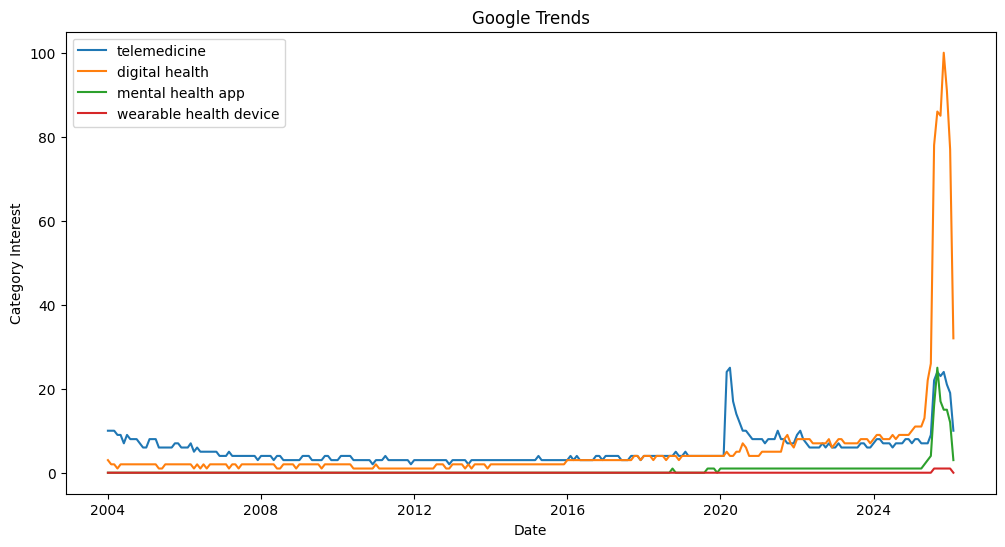

In [120]:
import matplotlib.pyplot as plt

# temporal patterns
plt.figure(figsize=(12,6))
plt.plot(google_data.index, google_data["telemedicine"], label="telemedicine")
plt.plot(google_data.index, google_data["digital health"], label="digital health")
plt.plot(google_data.index, google_data["mental health app"], label="mental health app")
plt.plot(google_data.index, google_data["wearable health device"], label="wearable health device")
plt.title("Google Trends")
plt.xlabel("Date")
plt.ylabel("Category Interest")
plt.legend()

plt.savefig('trends_time_series_chart.png', dpi=300, bbox_inches='tight')

plt.show() 


(b) Categorical/Frequency Analysis:
• Create at least one bar chart or histogram for categorical/frequency
data

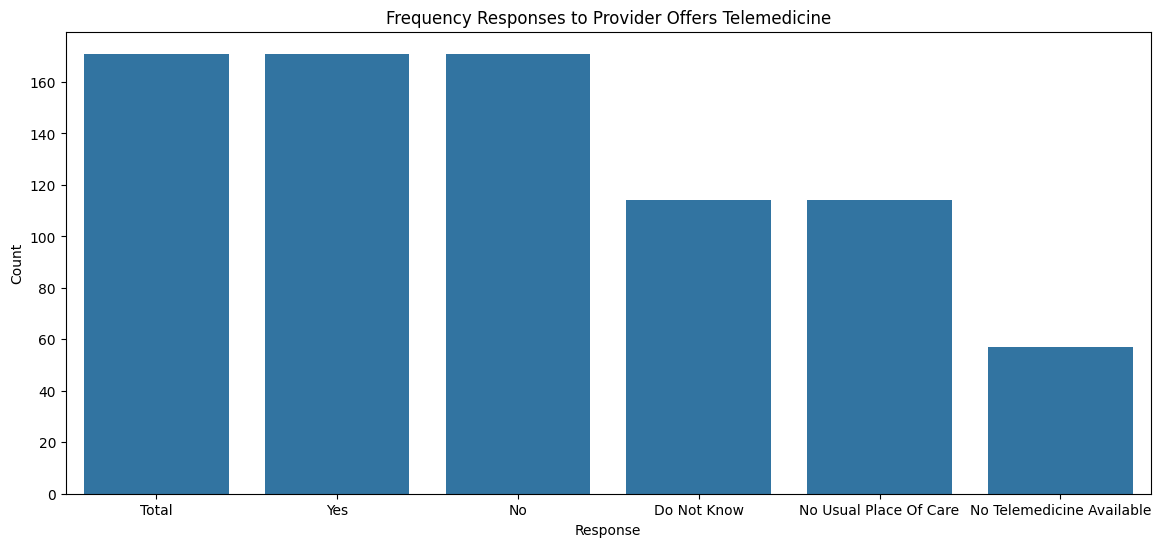

In [121]:
import seaborn as sns
plt.figure(figsize = (14,6))
sns.countplot(data = data_from_API, x = 'response', order = data_from_API['response'].value_counts().index)
plt.title('Frequency Responses to Provider Offers Telemedicine')
plt.xlabel('Response')
plt.ylabel('Count')

plt.savefig('api_response_count_plot.png', dpi=300, bbox_inches='tight')

plt.show()

(c) Correlation/Relationship Analysis:
• Create at least one visualization exploring relationships between
variables

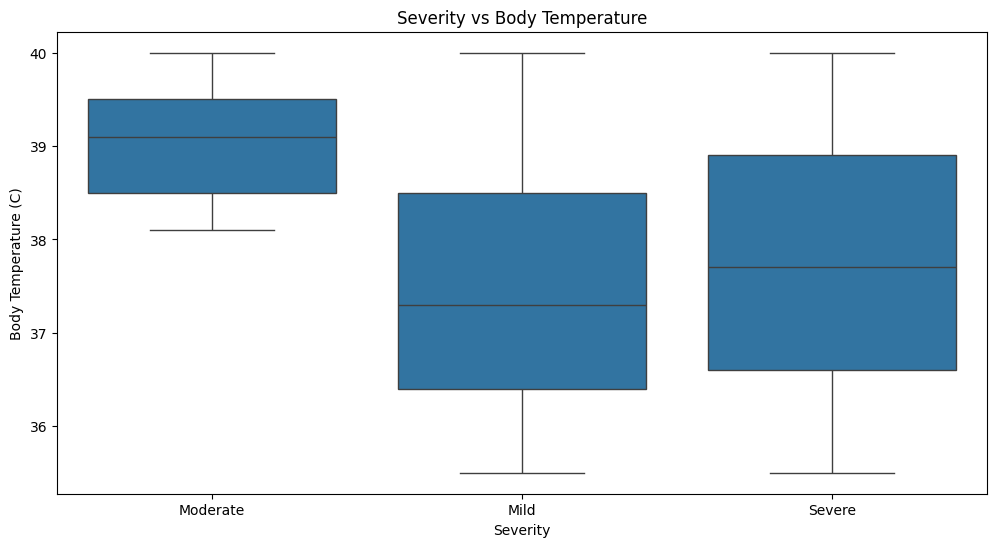

In [122]:
plt.figure(figsize = (12,6))
sns.boxplot(data = loaded_data, x = 'Severity' ,y = 'Body_Temperature_C')
plt.title('Severity vs Body Temperature')
plt.xlabel('Severity')
plt.ylabel('Body Temperature (C)')

plt.savefig('loaded_data_box_plot.png', dpi=300, bbox_inches='tight')

plt.show()